In [14]:
import random
import time
import pandas as pd

In [15]:
INF = int(1e9) + 10
N = int(1e3)
dist = [[INF for _ in range(N)] for _ in range(N)]

In [16]:
def floyd_warshall(n):
    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

In [17]:
def get_random_number():
    # 70% chance of getting 0 (True) and 30% chance of getting a non-zero value (False)
    is_zero = random.random() < 0.7
    if is_zero:
        return 0
    else:
        return random.randint(-100, 100)

In [18]:
if __name__ == "__main__":
    number_of_node =[]
    number_of_edge =[]
    duration_ =[]
    for node in range(20, 500, 10):
        n = node
        edge = 0

        for i in range(n):
            for j in range(i + 1, n):
                rnd = get_random_number()
                if rnd == 0:
                    dist[i][j] = INF
                else:
                    edge += 1
                    dist[i][j] = rnd
                    dist[j][i] = rnd

        for i in range(n):
            dist[i][i] = 0

        start = time.time()
        floyd_warshall(n)
        stop = time.time()

        duration = (stop - start) * 1e6  # convert to microseconds
        number_of_node.append(n)
        number_of_edge.append(edge)
        duration_.append(duration)
        print(f"node: {node}, Edge: {edge}, duration: {duration:.2f} microseconds")

    result = pd.DataFrame()
    result['Number_of_node'] = number_of_node
    result['Number_of_edge'] = number_of_edge
    result['duration'] = duration_

    result.to_csv("Floyed_warshall.csv", index=None) 
    #records are save to bellmanford.csv file
    print("Successfully completed")

node: 20, Edge: 53, duration: 3988.74 microseconds
node: 30, Edge: 141, duration: 8975.74 microseconds
node: 40, Edge: 239, duration: 15957.83 microseconds
node: 50, Edge: 367, duration: 29918.43 microseconds
node: 60, Edge: 541, duration: 49866.44 microseconds
node: 70, Edge: 750, duration: 77791.69 microseconds
node: 80, Edge: 933, duration: 132646.56 microseconds
node: 90, Edge: 1220, duration: 232379.44 microseconds
node: 100, Edge: 1477, duration: 245394.71 microseconds
node: 110, Edge: 1818, duration: 321140.53 microseconds
node: 120, Edge: 2085, duration: 430895.33 microseconds
node: 130, Edge: 2505, duration: 644235.61 microseconds
node: 140, Edge: 2921, duration: 831776.62 microseconds
node: 150, Edge: 3243, duration: 1136960.51 microseconds
node: 160, Edge: 3844, duration: 1370379.21 microseconds
node: 170, Edge: 4302, duration: 1858040.33 microseconds
node: 180, Edge: 4804, duration: 2662839.89 microseconds
node: 190, Edge: 5302, duration: 3185527.32 microseconds
node: 200, 

Text(0, 0.5, 'Time in microsecond')

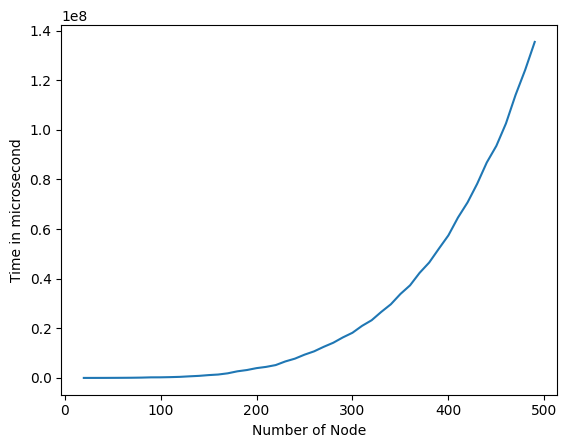

In [19]:
import matplotlib.pyplot as plt

result=pd.read_csv('Floyed_warshall.csv');
node=result.iloc[:,0].values
time=result.iloc[:,-1].values
edge=result.iloc[:,1].values

plt.plot(node,time)
plt.xlabel('Number of Node')
plt.ylabel('Time in microsecond')
